Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.fft import fft, ifft
import pickle

from kpz import *
from inverse import *

In [7]:
x_bounds = np.array([100, 250])
t_bounds = np.array([20, 32])
# t_bounds = np.array([10, 13])

Load data

In [8]:
filename = 'spread.pkl'
with open(filename, 'rb') as f:
    spread = pickle.load(f)
spread = np.array(spread)
y_bounds = np.array([0, spread.max()])

Run single simulation

In [9]:
h0, h1, verifyh, ha_result, y_bounds, finals, errs = runExperiment(spread, t_bounds[0], t_bounds[1], np.array([40], int), x_bounds, y_bounds)
ha_result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.00013723614218235102
        x: [ 1.896e-02  1.342e-01  9.890e-01]
      nit: 13
      jac: [-4.503e-06 -6.825e-08  3.730e-07]
 hess_inv: [[ 7.113e-03 -2.526e-01 -3.101e-03]
            [-2.526e-01  7.485e+03  9.506e+01]
            [-3.101e-03  9.506e+01  2.207e+00]]
     nfev: 72
     njev: 18

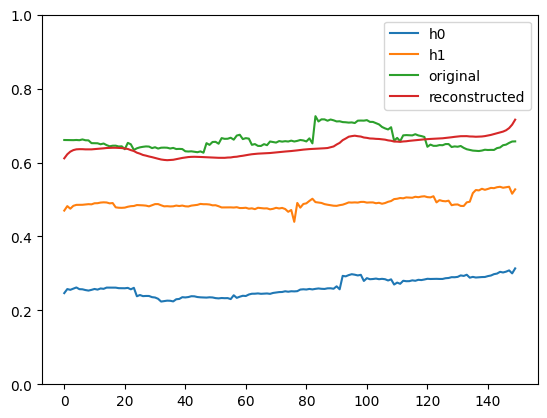

In [10]:
x = np.arange(len(h0)).astype(float)
plt.plot(x, h0, label='h0')
plt.plot(x, h1, label='h1')
plt.plot(x, verifyh[0], label='original')
plt.plot(x, finals[0].y[:, -1], label='reconstructed')
plt.ylim(0, 1)
plt.legend()

basically, investigating what's wrong with the KPZ equation and what it's failing to capture. if c v lamb don't capture much if any useful information about the spread, then the model isn't so good and i'll need a new equation

markov chain mc model for c v lamb